In [12]:
#%matplotlib inline
import os
#import matplotlib.pyplot as plt
import numpy as np
#from IPython.display import SVG
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
#from keras.utils.vis_utils import model_to_dot
#from tensorflow.python.keras.utils.vis_utils import model_to_dot

#os.environ['HTTP_PROXY'] = 'http://cachesrv.biwako.shiga-u.ac.jp:8080'

In [13]:
b_size = 200
n_classes = 10
n_hidden = 200
n_epoch = 100

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
img_size = 28

X_train = X_train.reshape(X_train.shape[0], img_size**2).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], img_size**2).astype('float32')/255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


/Users/mikio/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


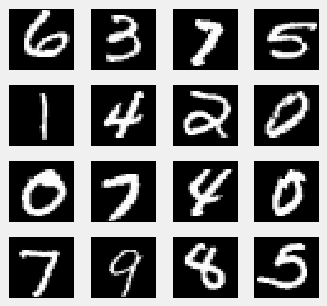

In [15]:
'''def draw_digit3(data, n, numbers_size, title=None):
    plt.subplot(numbers_size, numbers_size, n)
    Z = data.reshape(img_size, img_size)
    Z = Z[::-1,:]
    plt.xlim(0, img_size-1)
    plt.ylim(0, img_size-1)
    plt.pcolor(Z)
    if title is not None:
        plt.title(title, size=9)
    plt.gray()
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    
plt.style.use('fivethirtyeight')
numbers_size = 4
plt.figure(figsize=(5, 5))
for cnt, idx in enumerate(np.random.permutation(len(X_train))[:numbers_size**2]):
    draw_digit3(X_train[idx], cnt+1, numbers_size)'''

In [16]:
model = Sequential()

model.add(Dense(n_hidden, input_dim=img_size*img_size))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

#SVG(model_to_dot(model, show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=b_size, epochs=n_epoch, verbose=1, validation_data=(X_test,
                                                                                          Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.3754 - acc: 0.8978 - val_loss: 0.2071 - val_acc: 0.9426
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1789 - acc: 0.9489 - val_loss: 0.1444 - val_acc: 0.9577
Epoch 3/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.1312 - acc: 0.9620 - val_loss: 0.1155 - val_acc: 0.9672
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.1025 - acc: 0.9709 - val_loss: 0.1129 - val_acc: 0.9657
Epoch 5/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0845 - acc: 0.9762 - val_loss: 0.0878 - val_acc: 0.9733


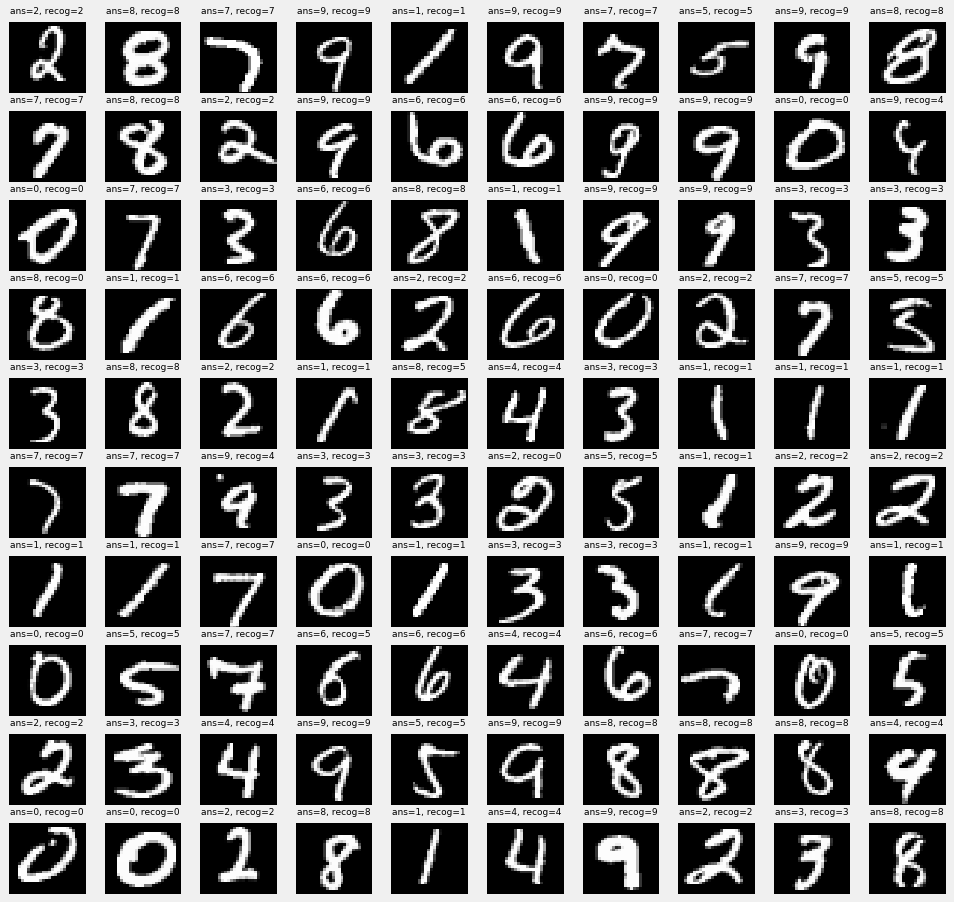

In [18]:
'''numbers_size = 10
plt.figure(figsize=(15, 15))
for cnt, idx in enumerate(np.random.permutation(len(X_test))[:numbers_size**2]):
    y = model.predict(X_test[int(idx):int(idx)+1], batch_size=1, verbose=0)
    draw_digit3(X_test[idx], cnt+1, numbers_size, "ans=%d, recog=%d"%(y_test[idx], np.argmax(y.data)))'''

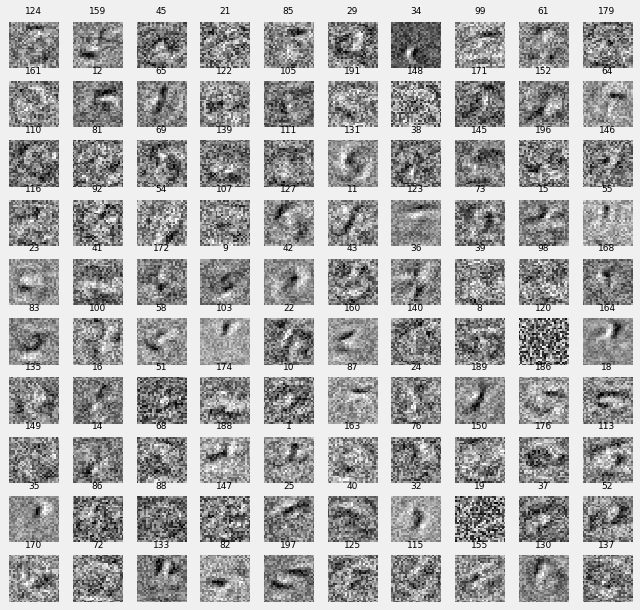

In [8]:
'''plt.figure(figsize=(10, 10))
for cnt, i in enumerate(np.random.permutation(n_hidden)[:numbers_size**2]):
    draw_digit3(model.layers[0].get_weights()[0].T[i], cnt+1, numbers_size, "%d"%i)'''
    